### What are the most demanded skills for the top 3 most popular Data jobs?

Methodology:
- clean-up skill column
- calculate skill count based on 'job_title_short'
- calculate skill percentage
- plot final findings on a graph

In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#quick cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States']

In [3]:
df_skills = df_US.explode('job_skills')

In [11]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() #it becomes a series

df_skills_count = df_skills_count.reset_index(name='skill_count') #it becomes a data frame once 

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True) #sorting the df by the skill_count

In [15]:
job_titles = df_skills_count['job_title_short'].unique().tolist() #picking unique values from the job_title_short

job_titles = sorted(job_titles[:3]) #getting top 3 unique values and sorting the alphabetically

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

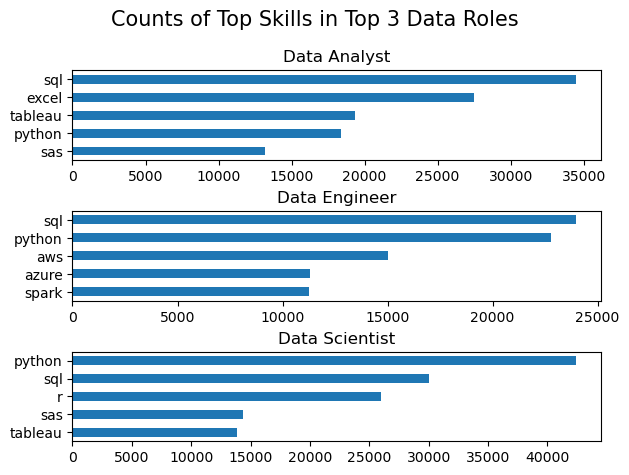

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Top 3 Data Roles', fontsize= 15)
fig.tight_layout(h_pad=0.5)

In [26]:
### Calculating the percentage of skills probability per job posting

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [32]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


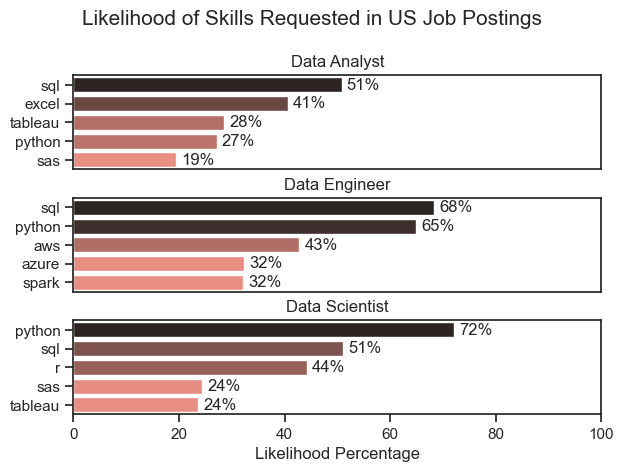

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:salmon_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[2].set_xlabel('Likelihood Percentage')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 100)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize= 15)
fig.tight_layout(h_pad=0.5)